# Análisis de datos médicos con aprendizaje no supervisado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import Birch

from scipy.cluster.hierarchy import dendrogram, linkage

# Metrics for evaluating clustering results
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Distance metrics
from sklearn.metrics import pairwise_distances

## ¿Por qué consideran que la base de datos que seleccionaron es adecuada para agrupamiento?

Tiene mucha información pero no hay alguna etiqueta que relacione las dietas entre los países. El agrupamiento sería una buena herramienta para realizar descubrimientos.

In [2]:
df = pd.read_csv('Food_Supply_kcal_Data.csv')

In [3]:
df.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,2.3012,0.7504,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,2.8244,2.7508,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,5.7638,2.0457,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,4.2741,0.3525,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,...,4.6904,1.2960,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [4]:
df.nlargest(5, 'Alcoholic Beverages')

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
91,Luxembourg,5.1574,17.4063,2.3988,0.0,11.9790,0.9595,0.8246,2.0690,7.9610,...,3.8681,1.3043,24.2,<2.5,8.150633,0.093354,7.661551,0.395728,632000.0,%
38,Czechia,4.8993,14.0415,3.8156,0.0,11.4011,0.5037,0.2900,1.2821,5.0366,...,8.1197,0.9005,28.5,<2.5,9.612841,0.159845,8.555328,0.897667,10716000.0,%
46,Estonia,4.8390,15.3336,1.9572,0.0,16.2121,0.7397,0.3390,1.5411,4.3612,...,2.4503,1.2329,23.8,2.9,3.569647,0.034260,2.828550,0.706837,1331000.0,%
18,Bosnia and Herzegovina,3.8856,9.0561,0.5507,0.0,21.2330,0.2907,0.1836,1.8969,3.0289,...,2.9524,2.2640,19.4,<2.5,3.762085,0.145535,2.960317,0.656233,3281000.0,%
21,Bulgaria,3.6782,12.2900,2.4580,0.0,17.9310,0.5836,0.2829,1.7683,4.3148,...,5.2520,0.8665,27.4,3.6,3.227256,0.134416,2.788956,0.303883,6927000.0,%


In [5]:
points = df.iloc[:,1:-8]
points

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables
0,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,...,0.5003,0.1001,0.3252,0.0750,0.0000,2.2261,0.1251,45.2476,2.3012,0.7504
1,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,...,0.8091,0.0000,1.2651,0.2501,0.0000,3.4422,0.3972,33.9070,2.8244,2.7508
2,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,...,1.0900,0.1195,1.9262,0.1493,0.0000,3.9869,0.2240,43.9749,5.7638,2.0457
3,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,...,1.4981,0.0000,12.6239,0.0441,0.0000,2.7539,0.0000,45.3184,4.2741,0.3525
4,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,4.6904,...,0.4526,0.3497,0.8434,0.4937,0.0000,5.8218,0.0823,34.6225,4.6904,1.2960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.8454,7.2303,0.6007,0.0,21.3126,0.2892,0.4449,2.3804,3.1368,2.6474,...,0.7341,0.0000,1.3571,0.0667,0.0000,7.7864,0.0000,42.7586,7.5417,0.6674
166,0.7150,10.9806,0.9363,0.0,26.9833,0.2894,1.0385,1.8046,7.8311,0.5618,...,0.4597,0.4256,0.7150,0.1021,0.1532,2.0940,0.3575,39.0364,1.3279,1.9578
167,0.0000,3.4667,0.3394,0.0,32.0727,0.1455,0.1697,1.1879,2.0121,0.6545,...,1.2121,0.0485,0.3152,0.1212,0.0000,7.0303,0.0242,46.5455,3.9515,0.3636
168,1.1925,3.3043,0.3230,0.0,31.5528,0.1988,0.5714,0.2236,1.5155,0.5217,...,0.2981,0.0745,4.0994,0.0248,0.0000,2.5590,0.0000,46.7081,3.0062,0.4472


##  ¿Qué preguntas consideran importantes que pueden responder con agrupamiento para esa base de datos? 

¿Cuál es el tipo de dieta asociada con la menor cantidad de muertes por covid? ¿Qué tipos de países la tienen? Por otro lado, ¿cuál es el tipo de dieta asociada con la mayor cantidad de muertes por covid? ¿Qué tipos de países la tiene?

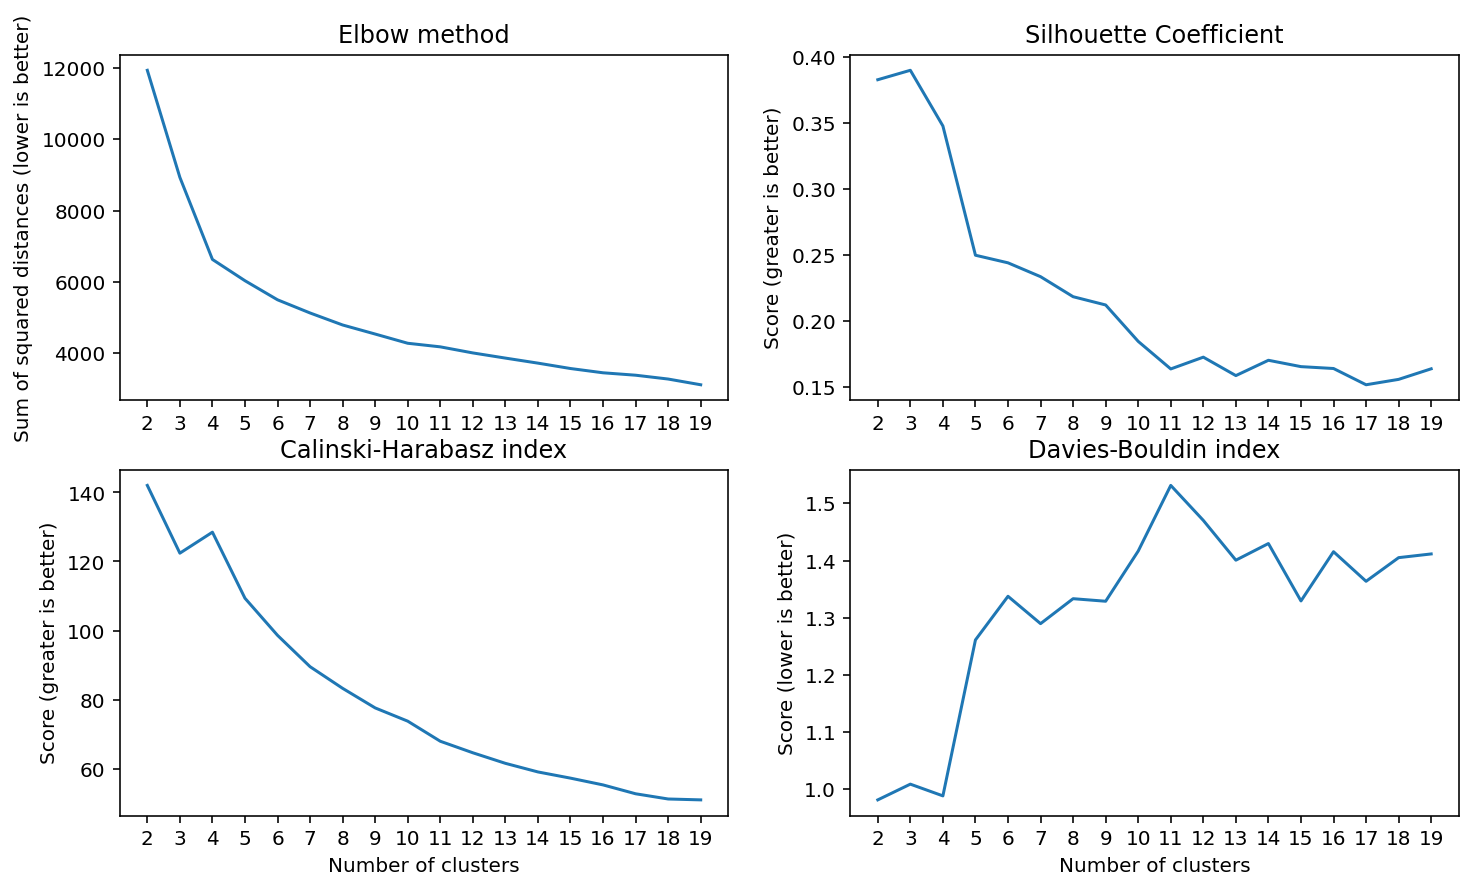

In [6]:

# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 20)
for k in ks:
    # Find clustering model
    kmeans = KMeans(n_clusters=k).fit(points)

    # Evaluate sum of squared distances
    sum_of_squared_distances.append(kmeans.inertia_)

    # Evaluate Silhouette score
    sscore.append(silhouette_score(points, kmeans.labels_))

    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(points, kmeans.labels_))

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(points, kmeans.labels_))

fig, axs = plt.subplots(2, 2)

axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_xlabel
axs[0][0].set_ylabel('Sum of squared distances (lower is better)')    
axs[0][0].set_title('Elbow method')
axs[0][0].set_xticks(ks)

axs[0][1].plot(ks, sscore)
axs[0][1].set_xlabel
axs[0][1].set_ylabel('Score (greater is better)')    
axs[0][1].set_title('Silhouette Coefficient')    
axs[0][1].set_xticks(ks)

axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')    
axs[1][0].set_title('Calinski-Harabasz index')    
axs[1][0].set_xticks(ks)

axs[1][1].plot(ks, dbscore)
axs[1][1].set_xlabel('Number of clusters')
axs[1][1].set_ylabel('Score (lower is better)')    
axs[1][1].set_title('Davies-Bouldin index')    
axs[1][1].set_xticks(ks)

plt.savefig('K-Means1.png')
plt.show()

Para el método de agrupamiento k-means, encontramos que el número óptimo de clusters es entre 3 y 4. Nosotros decidimos usar k=4.

In [7]:
kmeans = KMeans(n_clusters=4).fit(points)
df1 = df
df1['cluster'] = kmeans.labels_

In [8]:
#df1['Death number'] = df1['Deaths']*df1['Population']

In [9]:
dfgb = df1.groupby(by = 'cluster').mean()
pd.set_option('display.max_columns', None)
dfgb

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.185123,14.583105,2.397295,0.000908,14.472840,0.641122,0.743510,1.988273,6.010305,4.613855,0.228232,0.172992,0.784185,0.485632,0.137470,1.722487,0.534570,0.006285,5.615328,0.361102,35.418790,5.665767,1.230820,25.308772,3.668133,0.068939,2.317887,1.301227,4.702833e+07
1,0.981662,8.642136,0.911848,0.007486,21.366796,0.469093,0.627575,2.168318,3.590727,2.911793,0.173357,0.123962,1.014363,1.138930,0.231845,1.797298,0.256971,0.013657,5.852941,0.250746,41.358443,4.909757,1.200296,20.642857,1.914895,0.039459,1.672368,0.204685,2.582400e+07
2,1.047122,3.784839,0.263044,0.000000,17.663967,0.075172,0.641839,2.989567,2.049172,0.632039,0.075078,0.126006,2.114722,2.513622,0.186950,12.664406,0.098783,0.004711,2.232511,0.130428,46.215167,3.904356,0.586511,9.855556,0.137557,0.002051,0.107419,0.028088,2.981872e+07
3,0.565411,4.250028,0.439592,0.000000,29.979125,0.187669,0.445756,1.319481,1.772175,1.274747,0.064781,0.122719,1.268867,1.398544,0.181881,2.563981,0.101972,0.050344,3.186881,0.178322,45.753458,3.976131,0.918131,9.672222,0.425322,0.009426,0.376568,0.039328,7.678994e+07


In [10]:
df1[df1['cluster'] == 3]

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),cluster
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,0.0250,0.1251,0.1751,0.5003,0.1001,0.3252,0.0750,0.0000,2.2261,0.1251,45.2476,2.3012,0.7504,4.5,29.8,0.142134,0.006186,0.123374,0.012574,3.892800e+07,%,3
9,Azerbaijan,2.2555,8.1682,1.3050,0.0,28.7417,0.5478,0.0967,1.6111,2.9322,3.1738,0.0322,0.1128,0.0483,0.0806,0.0161,2.2072,0.3061,0.0000,3.4155,0.4511,41.8237,1.2083,1.4661,19.9,<2.5,2.285536,0.031223,2.225574,0.028740,1.010800e+07,%,3
11,Bangladesh,0.0000,2.3695,0.1541,0.0,37.5265,0.2312,0.8284,0.6550,0.3468,0.7706,0.0193,0.0385,0.1348,1.2329,0.5009,1.9264,0.0193,0.0193,1.4255,0.1156,47.6401,3.4290,0.6165,3.4,14.7,0.316691,0.004823,0.284344,0.027524,1.698090e+08,%,3
22,Burkina Faso,2.5188,2.7946,0.1287,0.0,31.6051,0.1471,0.2574,0.1471,1.1583,1.0112,0.0368,0.0919,3.6771,2.4269,0.0552,0.4780,0.0184,0.0000,1.7650,0.0735,47.1962,4.2103,0.2022,4.5,20,0.053710,0.000641,0.048031,0.005038,2.090300e+07,%,3
24,Cambodia,1.4153,4.0437,0.1011,0.0,33.0166,0.1011,1.7792,0.6470,1.7792,0.2022,0.1820,0.0809,1.8601,0.9300,0.1415,1.6983,0.0404,0.1415,4.1852,0.0404,45.9361,1.3142,0.3639,3.5,16.4,0.003059,0.000000,0.002930,0.000129,1.549700e+07,%,3
28,Chad,0.1436,6.9411,0.7659,0.0,27.8124,0.0239,0.4787,0.3112,3.0158,2.0345,0.0239,0.5984,5.5529,2.0345,0.0000,3.1833,0.0000,0.0000,2.0823,0.0000,43.0828,1.8191,0.0957,4.8,37.5,0.020578,0.000741,0.016881,0.002957,1.687700e+07,%,3
40,Djibouti,0.1306,3.7127,0.2799,0.0,27.8918,0.0746,0.1493,0.7836,1.4925,1.5858,0.2799,0.1306,0.1119,2.3881,0.2052,0.5597,0.2052,0.0000,6.1754,0.0933,46.2873,6.2500,1.2127,12.2,18.9,0.601316,0.006377,0.592308,0.002632,9.880000e+05,%,3
44,Egypt,0.0301,4.1999,0.5269,0.0,32.2144,0.1957,0.6322,2.5591,1.6408,0.9935,0.0151,0.2107,0.7828,0.6624,0.1204,1.2645,0.0452,0.3462,4.0644,0.0602,45.7926,2.0623,1.5806,31.1,4.5,0.167759,0.009527,0.131002,0.027229,1.008030e+08,%,3
47,Eswatini,1.5593,5.5925,0.5198,0.0,27.5468,0.1247,0.1663,1.4969,2.7651,1.8295,0.1663,0.1663,0.7277,0.7277,0.3326,2.8274,0.0416,0.0000,6.7152,0.1247,44.4075,1.7464,0.4158,13.5,20.6,1.465670,0.054710,1.038859,0.372101,1.104000e+06,%,3
48,Ethiopia,0.4774,2.0182,0.1519,0.0,31.5321,0.0434,0.0217,0.2821,0.6510,1.1068,0.0000,0.0651,0.4123,4.4705,0.5859,6.1198,0.0651,0.0000,1.8663,0.0868,47.9601,1.8012,0.2821,3.6,20.6,0.123093,0.001867,0.109237,0.011989,1.149160e+08,%,3


In [11]:
df1[df1['cluster'] == 2].head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),cluster
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,0.0661,0.1102,1.0795,1.4981,0.0000,12.6239,0.0441,0.0,2.7539,0.0000,45.3184,4.2741,0.3525,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%,2
16,Benin,1.7604,2.4864,0.0907,0.0,18.4755,0.0544,0.5263,0.7623,1.1978,0.5263,0.0544,0.0726,1.8693,1.6515,1.0163,14.4646,0.0181,0.0,1.4338,0.5082,47.5318,4.6461,0.8530,8.2,10.1,0.034344,0.000450,0.029183,0.004710,12209000.0,%,2
25,Cameroon,1.5263,2.1669,0.1507,0.0,20.5201,0.0188,0.5464,3.5048,0.9987,0.4145,0.0565,0.0565,2.3931,3.5613,0.6595,8.1213,0.0377,0.0,1.6017,0.3203,47.8236,4.1455,1.3755,9.5,9.9,0.118031,0.001782,0.110914,0.005335,26598000.0,%,2
27,Central African Republic,0.5402,7.3927,0.7393,0.0,8.9565,0.0569,0.4265,1.9050,4.9758,0.8814,0.0284,0.3412,2.3031,2.2747,0.0000,19.6759,0.0853,0.0,1.7060,0.0000,42.5931,4.8052,0.3128,6.3,59.6,0.103292,0.001304,0.101139,0.000849,4830000.0,%,2
32,Congo,1.6241,4.9805,0.0650,0.0,12.6462,0.0433,1.1693,1.8839,3.1832,0.2815,0.1083,0.2382,1.2343,0.6063,0.0000,17.7783,0.1299,0.0,3.5513,0.0000,45.0195,4.6990,0.7579,8.4,40.3,0.571675,0.014516,0.379721,0.177437,5518000.0,%,2


In [12]:
df1[df1['cluster'] == 1].head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),cluster
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,0.1045,0.0597,0.2688,1.0900,0.1195,1.9262,0.1493,0.0,3.9869,0.2240,43.9749,5.7638,2.0457,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%,1
15,Belize,1.5199,9.1752,2.6135,0.0,18.9064,0.2966,0.3707,2.5209,3.9481,1.8906,0.5190,0.0371,0.6117,2.2799,0.0371,0.5005,0.2966,0.0,7.6367,0.1297,40.8526,5.1158,0.7414,22.4,7.5,2.872792,0.073031,2.739618,0.060143,419000.0,%,1
17,Bolivia,0.7859,10.0255,0.9133,0.0,21.6440,0.5523,0.1062,2.4214,6.7545,1.6355,0.1274,0.0850,0.4036,0.9133,0.0850,3.5472,0.2761,0.0,5.6924,0.7859,39.9533,2.6551,0.6372,18.7,17.1,1.952446,0.092435,1.438614,0.421396,11633000.0,%,1
18,Bosnia and Herzegovina,3.8856,9.0561,0.5507,0.0,21.2330,0.2907,0.1836,1.8969,3.0289,4.8799,0.1989,0.1071,0.3060,0.7802,1.0402,2.2640,0.8414,0.0,3.0289,0.2601,40.9515,2.9524,2.2640,19.4,<2.5,3.762085,0.145535,2.960317,0.656233,3281000.0,%,1
19,Botswana,1.5598,8.1197,1.0470,0.0,22.3932,0.1068,0.1923,1.0256,1.8803,4.6795,0.4487,0.2137,0.4915,0.5769,0.3419,2.6709,0.2564,0.0,5.9402,0.0427,41.8803,5.4915,0.6410,16.1,26.4,1.014372,0.007035,0.844799,0.162538,2317000.0,%,1


In [13]:
df1[df1['cluster'] == 0]

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),cluster
1,Albania,0.9120,16.0930,1.0591,0.0000,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,0.0588,0.2648,1.0886,0.8091,0.0000,1.2651,0.2501,0.0000,3.4422,0.3972,33.9070,2.8244,2.7508,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2.838000e+06,%,0
4,Antigua and Barbuda,2.3041,15.3672,1.5429,0.0000,13.7215,0.2057,1.7280,3.6824,7.0356,4.6904,0.3086,0.1646,0.5966,0.4526,0.3497,0.8434,0.4937,0.0000,5.8218,0.0823,34.6225,4.6904,1.2960,19.1,NaN,0.293878,0.007143,0.190816,0.095918,9.800000e+04,%,0
5,Argentina,1.4354,14.9869,1.0650,0.0000,16.7927,0.8643,0.2006,1.4663,9.4459,3.1641,0.0000,0.2624,0.0309,0.1235,0.0309,1.4045,0.2315,0.0000,7.0536,0.0463,34.9900,5.5410,0.8643,28.5,4.6,4.356147,0.108227,3.905192,0.342729,4.537700e+07,%,0
6,Armenia,0.2274,12.8330,1.7706,0.0000,19.2658,0.7310,0.1787,2.5341,4.2235,5.6368,0.1137,0.2924,0.2274,0.4386,0.0162,1.2508,0.6985,0.0000,5.2956,0.3086,37.1670,3.5737,3.2164,20.9,4.3,5.681225,0.105345,5.398410,0.177470,2.956000e+06,%,0
7,Australia,1.9783,15.6146,1.9027,0.0000,11.6430,0.4681,0.6040,1.6611,7.4902,4.8022,0.2114,0.3473,0.6645,0.1359,0.1057,1.3138,0.5134,0.0000,5.7989,0.8457,34.3854,8.3812,1.1326,30.4,<2.5,0.112025,0.003530,0.101289,0.007207,2.575400e+07,%,0
8,Austria,2.8161,15.6106,5.2532,0.0000,12.3748,0.7853,0.4062,1.5976,5.0095,4.0482,0.0000,0.1083,0.6905,0.1083,0.1083,1.4622,0.3656,0.0000,6.2551,0.4197,34.3894,7.1622,1.0290,21.9,<2.5,4.739982,0.089679,4.496870,0.153433,8.914000e+06,%,0
10,Bahamas,2.9145,14.7930,1.4205,0.0000,10.7274,0.6613,1.2491,4.4575,8.1803,2.9880,1.0776,0.2694,1.0287,0.1225,0.2204,0.7103,0.4164,0.0000,8.6701,0.1714,35.2437,3.1594,1.5185,32.1,NaN,2.100763,0.044784,1.735115,0.320865,3.930000e+05,%,0
12,Barbados,1.1224,12.0877,1.1570,0.0000,15.3514,0.5871,1.4160,1.9340,5.6640,3.1428,0.8979,0.1036,1.1915,1.2606,0.2936,1.7095,0.2936,0.0000,8.0815,0.2763,37.9209,4.4552,1.0534,24.8,3.9,0.583972,0.006272,0.470035,0.107666,2.870000e+05,%,0
13,Belarus,3.2979,12.2644,2.6748,0.0000,14.2705,0.8511,0.4863,1.3982,5.7143,2.1884,0.1672,0.3495,0.2280,0.0000,0.0152,4.9848,0.3951,0.0000,4.6049,0.4255,37.7204,6.1246,1.8389,26.6,<2.5,2.740896,0.018912,2.612704,0.109280,9.375000e+06,%,0
14,Belgium,2.3089,14.1587,4.7771,0.0000,13.0441,0.6900,0.5971,1.3800,3.2776,4.6311,0.0000,0.1858,0.2389,0.2919,0.0929,2.1895,0.1194,0.0000,6.8073,0.5573,35.8413,7.0727,1.7383,24.5,<2.5,6.286322,0.185428,0.000000,6.100894,1.151500e+07,%,0


A partir de los resultados obtenidos podemos sacar las siguientes conclusiones: <br>
Considerando al grupo con mayor promedio de tasas de mortalidad de COVID como el grupo con la dieta menos sana y al grupo con menor promedio de tasas de mortalidad de COVID como el grupo con la dieta más sana, la dieta menos sana es aquella cuya ingesta calórica tiene más bebidas alcohólicas, nueces, estimulantes y productos de origen animal, incluyendo leche, carne, pescado, mariscos, vísceras, grasas animales, y también son los que consumen más aceites vegetales a pesar de que consumen menos productos de origen vegetal incluyendo cereales, legumbres, especias y raíces almidonadas. <br>
Por otro lado, la ingesta calórica del grupo con la dieta más sana tiene menos productos de origen animal como leche y carne, menos alcohol y más productos de origen vegetal como cereales, legumbres, especias y sobre todo raíces almidonadas.
Algunos países dentro del grupo con la peor dieta son Albania, Antigua y Barbuda y Argentina. Ejemplos dentro del grupo con la dieta más sana son Angola, Benín y Camerún.

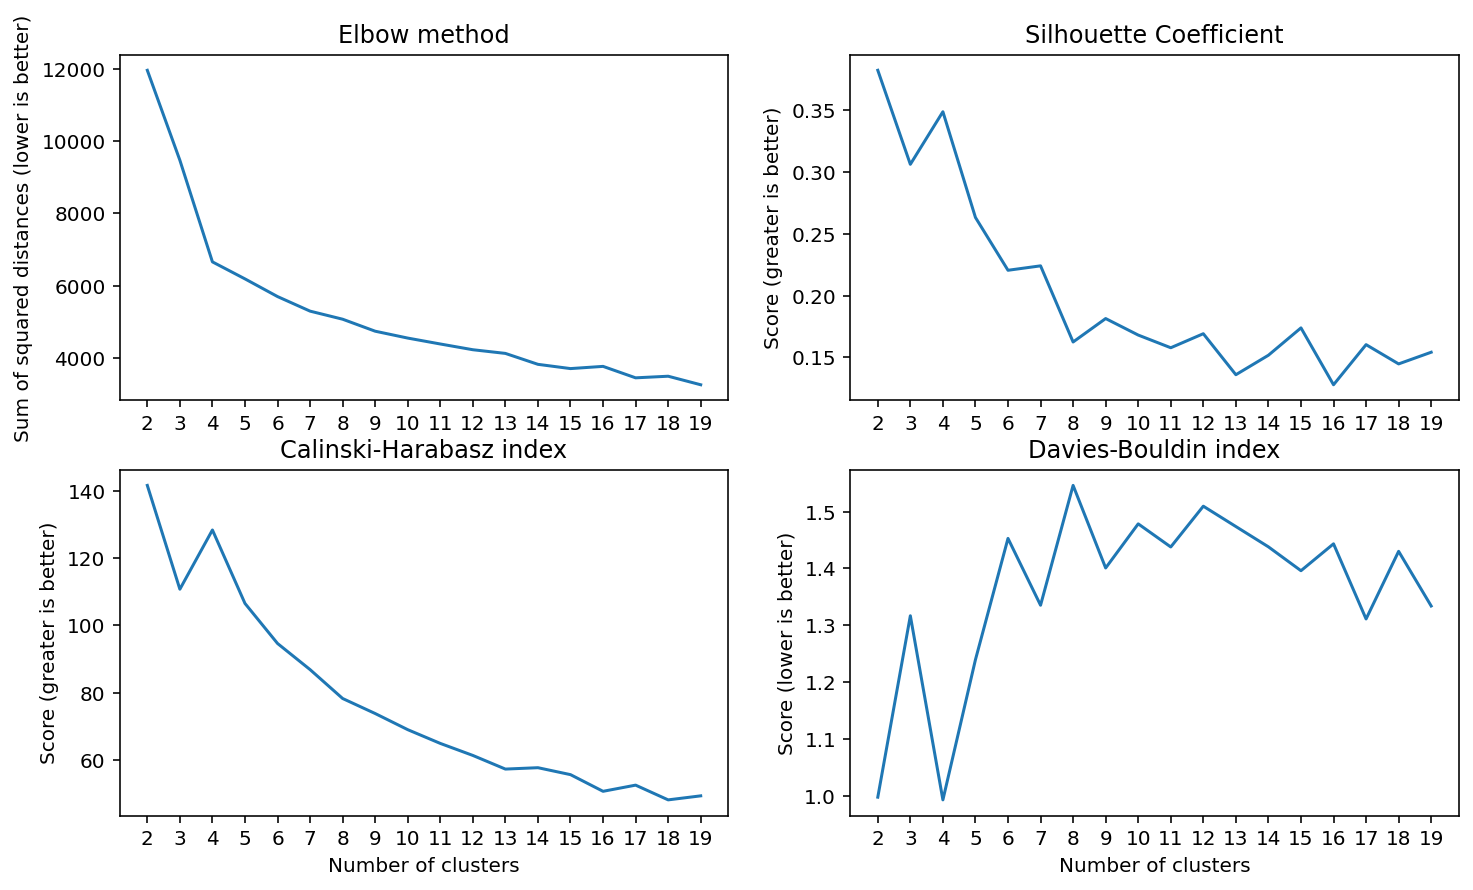

In [14]:


# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 20)
for k in ks:
    # Find clustering model
    optics = MiniBatchKMeans(n_clusters = k).fit(points)

    # Evaluate sum of squared distances
    sum_of_squared_distances.append(optics.inertia_)

    # Evaluate Silhouette score
    sscore.append(silhouette_score(points, optics.labels_))

    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(points, optics.labels_))

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(points, optics.labels_))

fig, axs = plt.subplots(2, 2)

axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_xlabel
axs[0][0].set_ylabel('Sum of squared distances (lower is better)')    
axs[0][0].set_title('Elbow method')
axs[0][0].set_xticks(ks)

axs[0][1].plot(ks, sscore)
axs[0][1].set_xlabel
axs[0][1].set_ylabel('Score (greater is better)')    
axs[0][1].set_title('Silhouette Coefficient')    
axs[0][1].set_xticks(ks)

axs[1][0].plot(ks, chscore)
axs[1][0].set_xlabel('Number of clusters')
axs[1][0].set_ylabel('Score (greater is better)')    
axs[1][0].set_title('Calinski-Harabasz index')    
axs[1][0].set_xticks(ks)

axs[1][1].plot(ks, dbscore)
axs[1][1].set_xlabel('Number of clusters')
axs[1][1].set_ylabel('Score (lower is better)')    
axs[1][1].set_title('Davies-Bouldin index')    
axs[1][1].set_xticks(ks)
plt.savefig('MBK-Means1.png')
plt.show()

Esta vez se aprecia que el número óptimo de grupos está entre 2 y 4, nosotros elegimos 4. 

In [15]:
mini = MiniBatchKMeans(n_clusters=4).fit(points)
df2 = df
df2['cluster'] = mini.labels_

In [16]:
dfgb2 = df2.groupby(by = 'cluster').mean()
pd.set_option('display.max_columns', None)
dfgb2

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.185123,14.583105,2.397295,0.000908,14.472840,0.641122,0.743510,1.988273,6.010305,4.613855,0.228232,0.172992,0.784185,0.485632,0.137470,1.722487,0.534570,0.006285,5.615328,0.361102,35.418790,5.665767,1.230820,25.308772,3.668133,0.068939,2.317887,1.301227,4.702833e+07
1,0.976237,8.787452,0.938828,0.007763,21.419517,0.475000,0.612980,2.020126,3.656000,2.973702,0.176093,0.123154,0.915298,1.139569,0.238613,1.694078,0.262761,0.014163,5.930272,0.259030,41.213148,4.947172,1.219041,20.857407,1.907301,0.038333,1.663142,0.207563,2.616870e+07
2,0.565411,4.250028,0.439592,0.000000,29.979125,0.187669,0.445756,1.319481,1.772175,1.274747,0.064781,0.122719,1.268867,1.398544,0.181881,2.563981,0.101972,0.050344,3.186881,0.178322,45.753458,3.976131,0.918131,9.672222,0.425322,0.009426,0.376568,0.039328,7.678994e+07
3,1.055225,3.878215,0.255080,0.000000,17.891905,0.098615,0.679820,3.307560,2.027090,0.692860,0.077520,0.127985,2.272160,2.374430,0.173165,11.856390,0.098970,0.004240,2.385760,0.120095,46.121790,3.903875,0.597280,10.355000,0.334655,0.008662,0.287441,0.038553,2.848855e+07


In [17]:
df2[df2['cluster'] == 3]

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),cluster
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,0.0661,0.1102,1.0795,1.4981,0.0000,12.6239,0.0441,0.0000,2.7539,0.0000,45.3184,4.2741,0.3525,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%,3
16,Benin,1.7604,2.4864,0.0907,0.0,18.4755,0.0544,0.5263,0.7623,1.1978,0.5263,0.0544,0.0726,1.8693,1.6515,1.0163,14.4646,0.0181,0.0000,1.4338,0.5082,47.5318,4.6461,0.8530,8.2,10.1,0.034344,0.000450,0.029183,0.004710,12209000.0,%,3
25,Cameroon,1.5263,2.1669,0.1507,0.0,20.5201,0.0188,0.5464,3.5048,0.9987,0.4145,0.0565,0.0565,2.3931,3.5613,0.6595,8.1213,0.0377,0.0000,1.6017,0.3203,47.8236,4.1455,1.3755,9.5,9.9,0.118031,0.001782,0.110914,0.005335,26598000.0,%,3
27,Central African Republic,0.5402,7.3927,0.7393,0.0,8.9565,0.0569,0.4265,1.9050,4.9758,0.8814,0.0284,0.3412,2.3031,2.2747,0.0000,19.6759,0.0853,0.0000,1.7060,0.0000,42.5931,4.8052,0.3128,6.3,59.6,0.103292,0.001304,0.101139,0.000849,4830000.0,%,3
32,Congo,1.6241,4.9805,0.0650,0.0,12.6462,0.0433,1.1693,1.8839,3.1832,0.2815,0.1083,0.2382,1.2343,0.6063,0.0000,17.7783,0.1299,0.0000,3.5513,0.0000,45.0195,4.6990,0.7579,8.4,40.3,0.571675,0.014516,0.379721,0.177437,5518000.0,%,3
34,Cote d'Ivoire,0.4579,2.1612,0.0549,0.0,18.8278,0.1282,0.6410,2.5458,0.8791,0.2747,0.0183,0.1832,1.2088,0.3846,0.2564,15.5495,0.5311,0.0000,1.6300,0.8425,47.8388,4.9451,0.6410,9.0,19,0.112959,0.000619,0.106105,0.006235,26175000.0,%,3
53,Gabon,2.0617,7.1874,0.1513,0.0,18.0064,0.0567,1.0781,5.2771,4.4638,0.9835,0.3215,0.4539,2.3454,0.0378,0.0000,8.3980,0.1702,0.0189,2.7237,0.0189,42.8031,2.8939,0.5485,13.4,10.5,0.513537,0.003182,0.483953,0.026401,2231000.0,%,3
57,Ghana,0.3956,2.1263,0.0989,0.0,13.8784,0.0659,0.9230,5.6865,0.7417,0.2308,0.0494,0.0824,1.6812,1.0219,0.5769,19.6143,0.0000,0.0659,1.9779,0.0989,47.8655,2.4065,0.4121,9.7,5.5,0.225424,0.001445,0.204364,0.019615,31073000.0,%,3
64,Haiti,2.0559,3.7884,0.3234,0.0,21.5754,0.0462,0.2079,2.9568,2.0790,1.0626,0.0924,0.0924,0.8085,3.8346,0.0000,5.7057,0.2079,0.0000,4.0425,0.0000,46.2000,4.5507,0.3696,20.5,49.3,0.103113,0.002149,0.080295,0.020670,11403000.0,%,3
93,Malawi,0.3588,4.0038,0.4344,0.0,23.3428,0.0755,0.3399,3.0784,2.9084,0.1322,0.0189,0.1322,1.3598,2.8706,0.0378,11.4259,0.0189,0.0000,1.5297,0.0378,45.9868,1.3220,0.5855,4.7,17.5,0.140486,0.004375,0.059320,0.076790,19130000.0,%,3


In [18]:
df2[df2['cluster'] == 2].head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),cluster
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,0.0250,0.1251,0.1751,0.5003,0.1001,0.3252,0.0750,0.0000,2.2261,0.1251,45.2476,2.3012,0.7504,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%,2
9,Azerbaijan,2.2555,8.1682,1.3050,0.0,28.7417,0.5478,0.0967,1.6111,2.9322,3.1738,0.0322,0.1128,0.0483,0.0806,0.0161,2.2072,0.3061,0.0000,3.4155,0.4511,41.8237,1.2083,1.4661,19.9,<2.5,2.285536,0.031223,2.225574,0.028740,10108000.0,%,2
11,Bangladesh,0.0000,2.3695,0.1541,0.0,37.5265,0.2312,0.8284,0.6550,0.3468,0.7706,0.0193,0.0385,0.1348,1.2329,0.5009,1.9264,0.0193,0.0193,1.4255,0.1156,47.6401,3.4290,0.6165,3.4,14.7,0.316691,0.004823,0.284344,0.027524,169809000.0,%,2
22,Burkina Faso,2.5188,2.7946,0.1287,0.0,31.6051,0.1471,0.2574,0.1471,1.1583,1.0112,0.0368,0.0919,3.6771,2.4269,0.0552,0.4780,0.0184,0.0000,1.7650,0.0735,47.1962,4.2103,0.2022,4.5,20,0.053710,0.000641,0.048031,0.005038,20903000.0,%,2
24,Cambodia,1.4153,4.0437,0.1011,0.0,33.0166,0.1011,1.7792,0.6470,1.7792,0.2022,0.1820,0.0809,1.8601,0.9300,0.1415,1.6983,0.0404,0.1415,4.1852,0.0404,45.9361,1.3142,0.3639,3.5,16.4,0.003059,0.000000,0.002930,0.000129,15497000.0,%,2


In [19]:
df2[df2['cluster'] == 1].head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),cluster
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,0.1045,0.0597,0.2688,1.0900,0.1195,1.9262,0.1493,0.0,3.9869,0.2240,43.9749,5.7638,2.0457,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%,1
15,Belize,1.5199,9.1752,2.6135,0.0,18.9064,0.2966,0.3707,2.5209,3.9481,1.8906,0.5190,0.0371,0.6117,2.2799,0.0371,0.5005,0.2966,0.0,7.6367,0.1297,40.8526,5.1158,0.7414,22.4,7.5,2.872792,0.073031,2.739618,0.060143,419000.0,%,1
17,Bolivia,0.7859,10.0255,0.9133,0.0,21.6440,0.5523,0.1062,2.4214,6.7545,1.6355,0.1274,0.0850,0.4036,0.9133,0.0850,3.5472,0.2761,0.0,5.6924,0.7859,39.9533,2.6551,0.6372,18.7,17.1,1.952446,0.092435,1.438614,0.421396,11633000.0,%,1
18,Bosnia and Herzegovina,3.8856,9.0561,0.5507,0.0,21.2330,0.2907,0.1836,1.8969,3.0289,4.8799,0.1989,0.1071,0.3060,0.7802,1.0402,2.2640,0.8414,0.0,3.0289,0.2601,40.9515,2.9524,2.2640,19.4,<2.5,3.762085,0.145535,2.960317,0.656233,3281000.0,%,1
19,Botswana,1.5598,8.1197,1.0470,0.0,22.3932,0.1068,0.1923,1.0256,1.8803,4.6795,0.4487,0.2137,0.4915,0.5769,0.3419,2.6709,0.2564,0.0,5.9402,0.0427,41.8803,5.4915,0.6410,16.1,26.4,1.014372,0.007035,0.844799,0.162538,2317000.0,%,1


In [20]:
df2[df2['cluster'] == 0].head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),cluster
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,0.0588,0.2648,1.0886,0.8091,0.0000,1.2651,0.2501,0.0,3.4422,0.3972,33.9070,2.8244,2.7508,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%,0
4,Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,4.6904,0.3086,0.1646,0.5966,0.4526,0.3497,0.8434,0.4937,0.0,5.8218,0.0823,34.6225,4.6904,1.2960,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%,0
5,Argentina,1.4354,14.9869,1.0650,0.0,16.7927,0.8643,0.2006,1.4663,9.4459,3.1641,0.0000,0.2624,0.0309,0.1235,0.0309,1.4045,0.2315,0.0,7.0536,0.0463,34.9900,5.5410,0.8643,28.5,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0,%,0
6,Armenia,0.2274,12.8330,1.7706,0.0,19.2658,0.7310,0.1787,2.5341,4.2235,5.6368,0.1137,0.2924,0.2274,0.4386,0.0162,1.2508,0.6985,0.0,5.2956,0.3086,37.1670,3.5737,3.2164,20.9,4.3,5.681225,0.105345,5.398410,0.177470,2956000.0,%,0
7,Australia,1.9783,15.6146,1.9027,0.0,11.6430,0.4681,0.6040,1.6611,7.4902,4.8022,0.2114,0.3473,0.6645,0.1359,0.1057,1.3138,0.5134,0.0,5.7989,0.8457,34.3854,8.3812,1.1326,30.4,<2.5,0.112025,0.003530,0.101289,0.007207,25754000.0,%,0


Esta agrupación  mostró resultados muy similares a los anteriores. Por ejemplo, hay un grupo para los países desarrollados con mucha obesidad, consumo calórico de alcohol y muertes por covid (como Estados Unidos), y otro grupo para los países en vías de desarrollo (buena parte de Latinoamérica) cuyo ingesta calórica destaca en productos acuáticos, endulzantes y especias. Sin embargo, los países más subdesarrollados (africanos y asiáticos) fueron agrupados de manera distinta, y esta vez uno de esos grupos aparenta tener menos muertes.

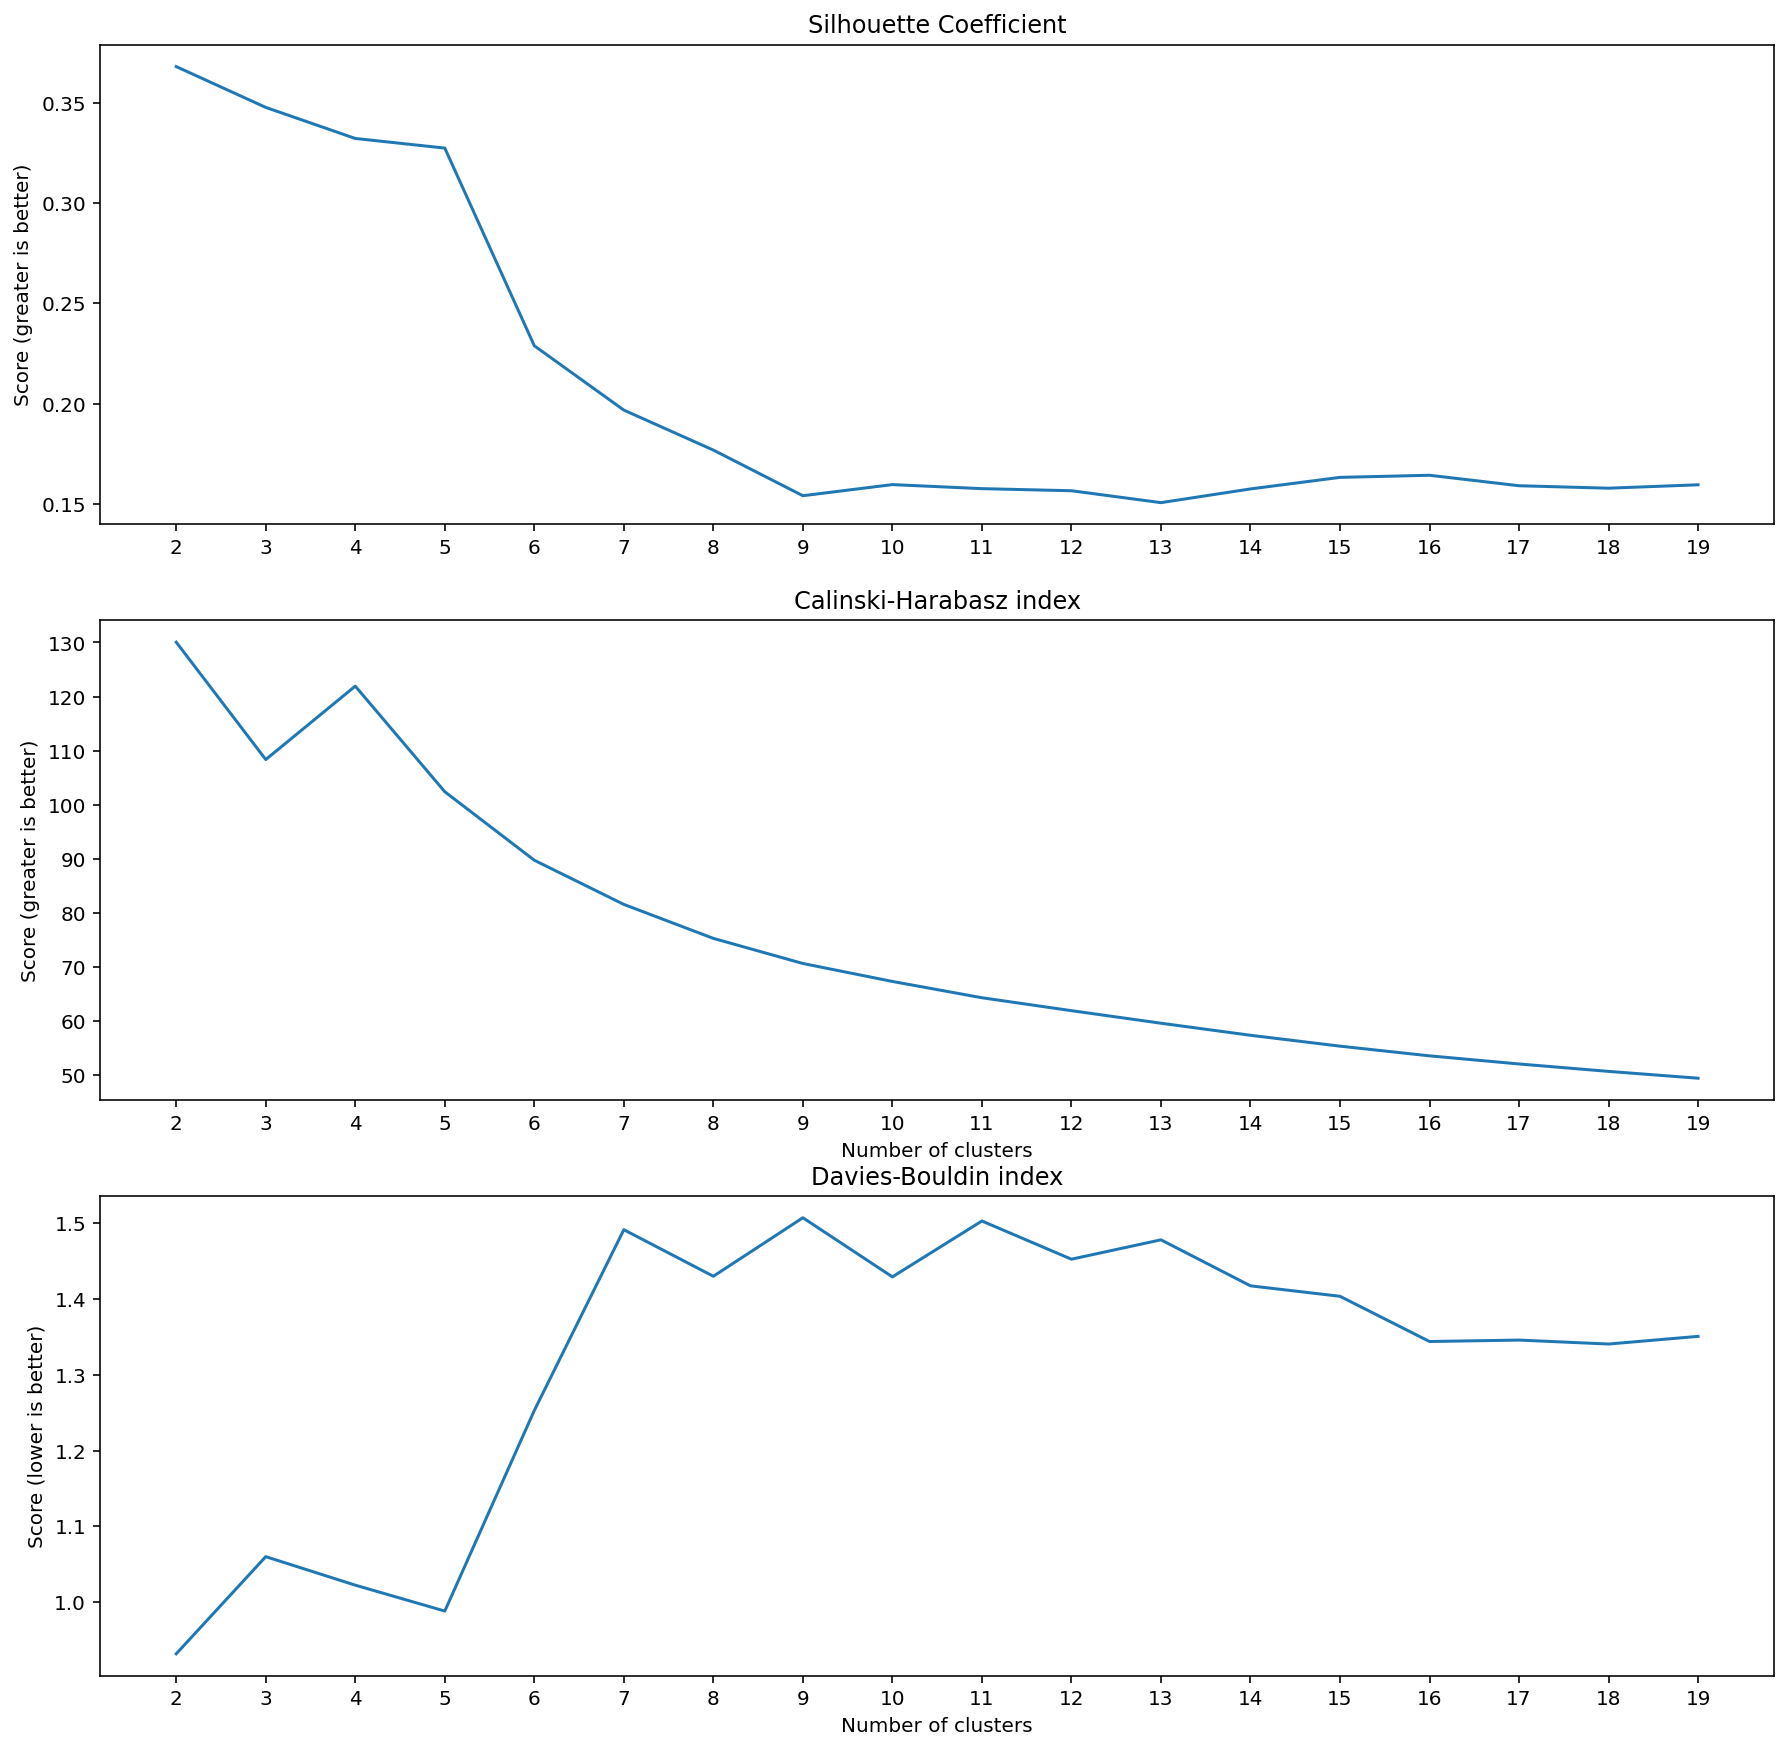

In [21]:
# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 20)
for k in ks:
    # Find clustering model
    brc = Birch(n_clusters=k).fit(points)

    # Evaluate sum of squared distances
    # sum_of_squared_distances.append(brc.inertia_)

    # Evaluate Silhouette score
    sscore.append(silhouette_score(points, brc.labels_))

    # Evaluate Calinski-Harabasz index
    chscore.append(calinski_harabasz_score(points, brc.labels_))

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(points, brc.labels_))
    
#fig2, ax2s = plt.subplots((1), figsize=(10,10))

    
fig, axs = plt.subplots((3), figsize=(15,15))
'''
axs[0][0].plot(ks, sum_of_squared_distances)
axs[0][0].set_xlabel('Number of clusters')
axs[0][0].set_ylabel('Sum of squared distances (lower is better)')    
axs[0][0].set_title('Elbow method')
axs[0][0].set_xticks(ks)
'''

axs[0].plot(ks, sscore)
axs[0].set_xlabel
axs[0].set_ylabel('Score (greater is better)')    
axs[0].set_title('Silhouette Coefficient')    
axs[0].set_xticks(ks)

axs[1].plot(ks, chscore)
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Score (greater is better)')    
axs[1].set_title('Calinski-Harabasz index')    
axs[1].set_xticks(ks)

axs[2].plot(ks, dbscore)
axs[2].set_xlabel('Number of clusters')
axs[2].set_ylabel('Score (lower is better)')    
axs[2].set_title('Davies-Bouldin index')    
axs[2].set_xticks(ks)
plt.savefig('Birch.png')
plt.show()

El número óptimo de clusters se encuentra entre 2 y 5. Consideramos que el mejor fue 5.

In [22]:
brc = Birch(n_clusters=5).fit(points)
df3 = df
df3['cluster'] = brc.labels_

In [23]:
dfgb3 = df3.groupby(by = 'cluster').mean()
pd.set_option('display.max_columns', None)
dfgb3

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.167144,14.472485,2.381618,0.000893,14.475661,0.640662,0.740261,2.061669,5.930320,4.602269,0.230085,0.173393,0.785159,0.497377,0.135541,1.725154,0.524157,0.006182,5.602354,0.351762,35.529349,5.747115,1.219379,25.277586,3.621572,0.068914,2.378794,1.191587,4.637341e+07
1,0.564217,4.486097,0.468620,0.000000,30.015774,0.207440,0.429637,1.356834,1.798337,1.451663,0.063383,0.121826,1.222397,1.422106,0.193997,2.089897,0.108626,0.047091,3.401331,0.201651,45.519286,3.838623,0.991169,10.840000,0.492520,0.011569,0.430030,0.050921,7.985989e+07
2,1.006028,8.761783,0.914596,0.007763,21.217557,0.454039,0.658263,2.109478,3.774676,2.825111,0.177350,0.128315,1.245219,1.092915,0.234407,1.953513,0.264574,0.014513,5.829411,0.245826,41.237957,4.692789,1.153915,20.303704,1.871499,0.035932,1.534843,0.304358,2.504706e+07
3,0.974794,3.139531,0.211038,0.000000,21.117281,0.112381,0.548800,2.286994,1.502013,0.673900,0.065388,0.092837,1.479400,2.369562,0.175394,10.426037,0.100838,0.010263,2.210081,0.161650,46.860250,4.773188,0.708400,9.568750,0.294507,0.009116,0.260081,0.025310,3.363944e+07
4,0.854475,4.217550,0.254025,0.000000,11.229725,0.047175,0.708725,4.570250,2.456600,0.568575,0.052175,0.188025,1.502200,2.866675,0.155525,18.393350,0.059450,0.016475,2.164400,0.024725,45.779675,3.401025,0.489225,7.300000,0.256631,0.004735,0.194559,0.057337,1.359325e+07


In [24]:
df3[df3['cluster'] == 4].head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),cluster
27,Central African Republic,0.5402,7.3927,0.7393,0.0,8.9565,0.0569,0.4265,1.9050,4.9758,0.8814,0.0284,0.3412,2.3031,2.2747,0.0000,19.6759,0.0853,0.0000,1.7060,0.0000,42.5931,4.8052,0.3128,6.3,59.6,0.103292,0.001304,0.101139,0.000849,4830000.0,%,4
32,Congo,1.6241,4.9805,0.0650,0.0,12.6462,0.0433,1.1693,1.8839,3.1832,0.2815,0.1083,0.2382,1.2343,0.6063,0.0000,17.7783,0.1299,0.0000,3.5513,0.0000,45.0195,4.6990,0.7579,8.4,40.3,0.571675,0.014516,0.379721,0.177437,5518000.0,%,4
57,Ghana,0.3956,2.1263,0.0989,0.0,13.8784,0.0659,0.9230,5.6865,0.7417,0.2308,0.0494,0.0824,1.6812,1.0219,0.5769,19.6143,0.0000,0.0659,1.9779,0.0989,47.8655,2.4065,0.4121,9.7,5.5,0.225424,0.001445,0.204364,0.019615,31073000.0,%,4
127,Rwanda,0.8580,2.3707,0.1129,0.0,9.4378,0.0226,0.3161,8.8056,0.9257,0.8806,0.0226,0.0903,0.7902,7.5638,0.0452,16.5049,0.0226,0.0000,1.4224,0.0000,47.6406,1.6934,0.4741,4.8,36.8,0.126135,0.001675,0.093013,0.031447,12952000.0,%,4


In [25]:
df3[df3['cluster'] == 3].head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),cluster
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,0.0661,0.1102,1.0795,1.4981,0.0000,12.6239,0.0441,0.0,2.7539,0.0000,45.3184,4.2741,0.3525,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%,3
16,Benin,1.7604,2.4864,0.0907,0.0,18.4755,0.0544,0.5263,0.7623,1.1978,0.5263,0.0544,0.0726,1.8693,1.6515,1.0163,14.4646,0.0181,0.0,1.4338,0.5082,47.5318,4.6461,0.8530,8.2,10.1,0.034344,0.000450,0.029183,0.004710,12209000.0,%,3
25,Cameroon,1.5263,2.1669,0.1507,0.0,20.5201,0.0188,0.5464,3.5048,0.9987,0.4145,0.0565,0.0565,2.3931,3.5613,0.6595,8.1213,0.0377,0.0,1.6017,0.3203,47.8236,4.1455,1.3755,9.5,9.9,0.118031,0.001782,0.110914,0.005335,26598000.0,%,3
34,Cote d'Ivoire,0.4579,2.1612,0.0549,0.0,18.8278,0.1282,0.6410,2.5458,0.8791,0.2747,0.0183,0.1832,1.2088,0.3846,0.2564,15.5495,0.5311,0.0,1.6300,0.8425,47.8388,4.9451,0.6410,9.0,19,0.112959,0.000619,0.106105,0.006235,26175000.0,%,3
61,Guinea,0.0894,2.4150,0.1610,0.0,24.8479,0.1073,0.3399,2.5939,1.0376,0.6619,0.0716,0.1073,1.8784,0.7335,0.0000,6.7979,0.0894,0.0,2.2182,0.0000,47.5850,6.6547,1.6100,6.6,16.5,0.116760,0.000669,0.114013,0.002078,12560000.0,%,3


In [26]:
df3[df3['cluster'] == 2].head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),cluster
15,Belize,1.5199,9.1752,2.6135,0.0,18.9064,0.2966,0.3707,2.5209,3.9481,1.8906,0.5190,0.0371,0.6117,2.2799,0.0371,0.5005,0.2966,0.0,7.6367,0.1297,40.8526,5.1158,0.7414,22.4,7.5,2.872792,0.073031,2.739618,0.060143,419000.0,%,2
17,Bolivia,0.7859,10.0255,0.9133,0.0,21.6440,0.5523,0.1062,2.4214,6.7545,1.6355,0.1274,0.0850,0.4036,0.9133,0.0850,3.5472,0.2761,0.0,5.6924,0.7859,39.9533,2.6551,0.6372,18.7,17.1,1.952446,0.092435,1.438614,0.421396,11633000.0,%,2
18,Bosnia and Herzegovina,3.8856,9.0561,0.5507,0.0,21.2330,0.2907,0.1836,1.8969,3.0289,4.8799,0.1989,0.1071,0.3060,0.7802,1.0402,2.2640,0.8414,0.0,3.0289,0.2601,40.9515,2.9524,2.2640,19.4,<2.5,3.762085,0.145535,2.960317,0.656233,3281000.0,%,2
19,Botswana,1.5598,8.1197,1.0470,0.0,22.3932,0.1068,0.1923,1.0256,1.8803,4.6795,0.4487,0.2137,0.4915,0.5769,0.3419,2.6709,0.2564,0.0,5.9402,0.0427,41.8803,5.4915,0.6410,16.1,26.4,1.014372,0.007035,0.844799,0.162538,2317000.0,%,2
23,Cabo Verde,1.2525,8.5288,1.0537,0.0,23.8171,0.3380,0.3976,1.4513,3.4394,3.2207,0.4374,0.0795,0.4374,2.2068,0.4970,1.8887,0.1789,0.0,3.6183,0.0596,41.4712,4.4930,1.1332,10.6,12.6,2.586331,0.024281,2.461151,0.100899,556000.0,%,2


In [27]:
df3[df3['cluster'] == 1].head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),cluster
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,0.0250,0.1251,0.1751,0.5003,0.1001,0.3252,0.0750,0.0000,2.2261,0.1251,45.2476,2.3012,0.7504,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%,1
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,0.1045,0.0597,0.2688,1.0900,0.1195,1.9262,0.1493,0.0000,3.9869,0.2240,43.9749,5.7638,2.0457,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%,1
9,Azerbaijan,2.2555,8.1682,1.3050,0.0,28.7417,0.5478,0.0967,1.6111,2.9322,3.1738,0.0322,0.1128,0.0483,0.0806,0.0161,2.2072,0.3061,0.0000,3.4155,0.4511,41.8237,1.2083,1.4661,19.9,<2.5,2.285536,0.031223,2.225574,0.028740,10108000.0,%,1
11,Bangladesh,0.0000,2.3695,0.1541,0.0,37.5265,0.2312,0.8284,0.6550,0.3468,0.7706,0.0193,0.0385,0.1348,1.2329,0.5009,1.9264,0.0193,0.0193,1.4255,0.1156,47.6401,3.4290,0.6165,3.4,14.7,0.316691,0.004823,0.284344,0.027524,169809000.0,%,1
22,Burkina Faso,2.5188,2.7946,0.1287,0.0,31.6051,0.1471,0.2574,0.1471,1.1583,1.0112,0.0368,0.0919,3.6771,2.4269,0.0552,0.4780,0.0184,0.0000,1.7650,0.0735,47.1962,4.2103,0.2022,4.5,20,0.053710,0.000641,0.048031,0.005038,20903000.0,%,1


In [28]:
df3[df3['cluster'] == 0].head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population),cluster
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,0.0588,0.2648,1.0886,0.8091,0.0000,1.2651,0.2501,0.0,3.4422,0.3972,33.9070,2.8244,2.7508,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%,0
4,Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,4.6904,0.3086,0.1646,0.5966,0.4526,0.3497,0.8434,0.4937,0.0,5.8218,0.0823,34.6225,4.6904,1.2960,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%,0
5,Argentina,1.4354,14.9869,1.0650,0.0,16.7927,0.8643,0.2006,1.4663,9.4459,3.1641,0.0000,0.2624,0.0309,0.1235,0.0309,1.4045,0.2315,0.0,7.0536,0.0463,34.9900,5.5410,0.8643,28.5,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0,%,0
6,Armenia,0.2274,12.8330,1.7706,0.0,19.2658,0.7310,0.1787,2.5341,4.2235,5.6368,0.1137,0.2924,0.2274,0.4386,0.0162,1.2508,0.6985,0.0,5.2956,0.3086,37.1670,3.5737,3.2164,20.9,4.3,5.681225,0.105345,5.398410,0.177470,2956000.0,%,0
7,Australia,1.9783,15.6146,1.9027,0.0,11.6430,0.4681,0.6040,1.6611,7.4902,4.8022,0.2114,0.3473,0.6645,0.1359,0.1057,1.3138,0.5134,0.0,5.7989,0.8457,34.3854,8.3812,1.1326,30.4,<2.5,0.112025,0.003530,0.101289,0.007207,25754000.0,%,0


Este método nos entrega que el grupo con más saludable tiene un porcentaje de .004% de muertes COVID-19 mientras que el grupo menos saludable tiene un porcentaje de .069% de muertes por COVID-19, se puede apreciar que los grupos menos saludables (0,2) son muy similares pero a diferencia de los otros modelos anteriores este al emplear 5 clusters los grupos más saludables. El cluster nuevo es básicamente una nueva partición de los países subdesarrollados.

Reconocemos que los métodos de agrupamiento podrían tener mejores resultados si se incluyera el promedio de calorías consumidas por país para saber las calorías que se consumen de cada categoría, en lugar de la proporción.